# Steps for Anomaly Detection using PyOD:
Convert Date to Datetime: This will help in plotting and analyzing time series data.
Select the 'Baggage' Column: Since we are focusing on baggage complaints.
Apply an Anomaly Detection Model: We will use the Isolation Forest model from PyOD, which is effective for detecting outliers in the data.
Visualize the Results: We will plot the time series data and highlight the anomalies detected by the model.

In [2]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=96c0485a3b4250b9f9ddc1213b1af1f09596dcc1fa459dd9e4ff24249f026094
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/baggagecomplaints(time series).csv')

# Display the first few rows of the dataset
print(df.head())


          Airline     Date  Month  Year  Baggage  Scheduled  Cancelled  \
0  American Eagle  01/2004      1  2004    12502      38276       2481   
1  American Eagle  02/2004      2  2004     8977      35762        886   
2  American Eagle  03/2004      3  2004    10289      39445       1346   
3  American Eagle  04/2004      4  2004     8095      38982        755   
4  American Eagle  05/2004      5  2004    10618      40422       2206   

   Enplaned  
0    992360  
1   1060618  
2   1227469  
3   1234451  
4   1267581  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


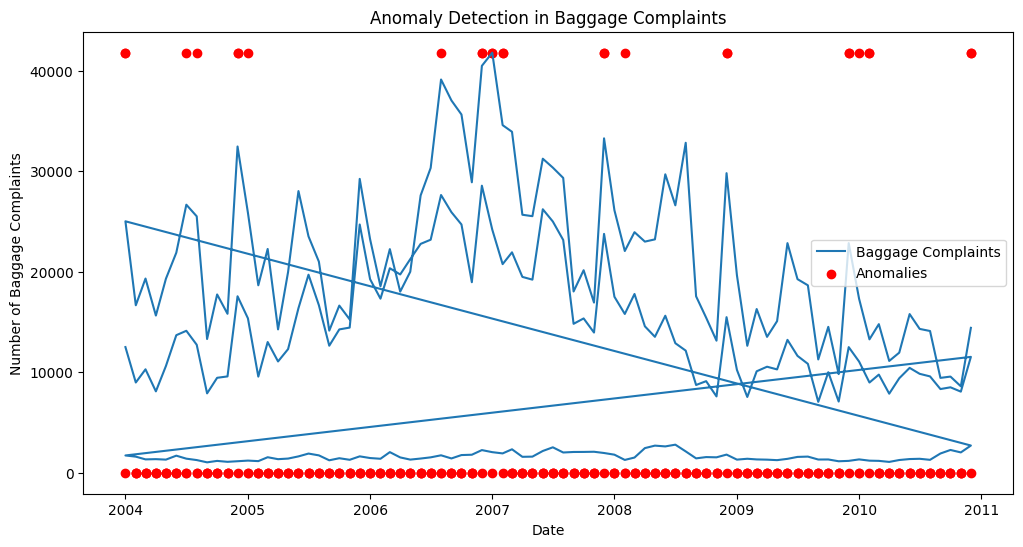

In [10]:
import pandas as pd
import numpy as np
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

# Load the dataset
df_baggage_complaints = pd.read_csv('/content/baggagecomplaints(time series).csv')

# Convert Date to datetime and set as index if applicable
df_baggage_complaints['Date'] = pd.to_datetime(df_baggage_complaints['Date'], format='%m/%Y')
df_baggage_complaints.set_index('Date', inplace=True)

# Selecting only numeric columns for anomaly detection
numeric_data = df_baggage_complaints.select_dtypes(include=[np.number])

# Applying Isolation Forest for anomaly detection
clf = IForest()
clf.fit(numeric_data)

# Getting the anomaly scores
scores = clf.decision_function(numeric_data)

# Flagging anomalies
numeric_data['Anomaly'] = clf.predict(numeric_data)

# Plotting the results (using 'Baggage' column for plotting)
plt.figure(figsize=(12, 6))
plt.plot(df_baggage_complaints.index, df_baggage_complaints['Baggage'], label='Baggage Complaints')
plt.scatter(df_baggage_complaints.index, numeric_data['Anomaly'] * max(df_baggage_complaints['Baggage']), color='r', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection in Baggage Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Baggage Complaints')
plt.show()


# Explaining the graph:

This is a line plot titled "A**nomaly Detection in Baggage Complaints**" which represents a time series analysis of baggage complaints data over a period from 2004 to 2011. The primary components of the plot are as follows:

**Blue Line**: Represents the number of baggage complaints over time. The line shows fluctuations in the number of complaints, with certain points showing significant spikes.

**Red Dots**: Indicate anomalies in the data. These are the points that the anomaly detection algorithm has identified as being significantly different from the normal pattern - they could be unusually high or low values that do not conform to the expected range or trend.

**X-Axis (Date)**: Shows the time from 2004 to 2011, likely in months or quarters (the specific time intervals are not labeled).

**Y-Axis (Number of Baggage Complaints)**: Quantifies the number of complaints, ranging from 0 to a value over 40,000.

**Legend**: There is a legend in the bottom right corner that identifies the blue line as "Baggage Complaints" and the red dots as "Anomalies".

From the plot, we can infer that there were several periods where the number of baggage complaints was significantly higher or lower than the norm, suggesting potential issues or changes in the operational process, external factors affecting traveler behavior, or data recording errors. These anomalies are critical for businesses as they could indicate systemic issues that need addressing or highlight potential data integrity problems.